# Multilabel Classification Project Solution

Merhaba arkadaşlar. Kursumuzun ilk projesinin detayları aşağıda açıklanmıştır.
Beyaz eşya ürünleri satan bir firmasınız.

1. Firmanızla ilgili yapılan yorumları;
- Firmanız bazında,
- Sattığınız ürünler bazında,
- Firma çalışanlarınız bazında,
- Çalıştığınız kargo firmaları bazında olumlu, olumsuz, nötr ve Null olarak ayrı ayrı sentiment etmeniz beklenmektedir (multilabel classification).

2. Bahse konu proje için en az 150 gözlemden oluşan Türkçe bir data bulmanız veya LLM'ler vasıtasıyla kendinizin hazırlaması gerekmedir.

3. Proje GPT, Gemini ve istediğiniz herhangibir open source modelin üçü ile de ayrı ayrı yapılacak ve istediğiniz sonuçları veren en iyi model seçilecektir.

4. Opsiyonel olarak yapılan her bir labellama 1-5 arasında puanlanacaktır(1-2 negatif, 3 nötr, 4-5 olumlu)

In [ ]:
train = ["Merhaba Arçelik firmasında çalışan arkadaşların yardımsever tavırları ile bana önerdikleri kahve makinesini aldım. Makine yurtiçi kargo ile \
gönderildi ama çok geç getirildi. Makine ilk başlarda çok güzel çalışşa da kısa sürede bozuldu. Ancak Arçelik firması hemen makineyi yenisiyle değiştirdi. Tşk ederim.",
          "ürün çok güzeldi. ancak kargo berbat",
          "Arçelik firmasından aldığım buzdolabı çok hızlı bir şekilde teslim edildi. Çalışanlar oldukça nazik ve yardımcı oldular. Ürün gayet güzel çalışıyor, çok memnunum.",
          "Siemens firmasından aldığım çamaşır makinesi beklediğimden daha gürültülü çalışıyor. Ürün sorununu çözmek için çağrı merkezine ulaştım ancak pek yardımcı olamadılar.",
          "Bosch firmasından aldığım mikrodalga fırın harika! Ancak çalışanlar çok ilgisizdi ve ürünle ilgili sorduğum sorulara yeterli cevap vermediler. Kargo da biraz geç geldi.",
          "Arçelik'ten aldığım televizyonu hemen kurdular. Çalışanlar oldukça profesyoneldi. Ancak televizyonun görüntü kalitesi beklediğim gibi değil.",
          "Vestel'den aldığım klima çok hızlı teslim edildi ve çalışanlar kurulumda çok yardımcı oldular. Ancak klima beklediğim kadar iyi soğutmuyor.",
          "Profilo firmasından aldığım bulaşık makinesi zamanında teslim edildi ancak çalışmıyor. Müşteri hizmetleriyle görüştüm, hemen ilgilendiler ve değişim talep ettiler.",
          "Arçelik'ten aldığım süpürge çok sesli çalışıyor, iade etmeyi düşünüyorum. Müşteri hizmetleri ise pek yardımcı olmadı.",
          "Bosch marka buzdolabı aldım, mükemmel soğutuyor ve çok sessiz. Çalışanlar da çok ilgiliydi, teslimat çok hızlı oldu.",
          "Siemens'ten aldığım fırın bozuldu. Servis de çok geç geldi ve tamir edemedi. Kargo da gecikti.",
          "Profilo'dan aldığım buzdolabı beklediğimden daha küçük geldi. Teslimat ve çalışanlar iyiydi ama ürün istediğim gibi değil.",
          "Arçelik'ten aldığım çamaşır makinesi çok kaliteli, fakat kargo firması ürünü zarar görmüş şekilde getirdi.",
          "Siemens marka süpürge aldım, çekim gücü çok iyi ama çalışanlar çok ilgisizdi. Teslimat ise zamanında gerçekleşti.",
          "Bosch'tan aldığım mikser ilk gün bozuldu. İade etmek zorunda kaldım. Çalışanlar ise nazikti.",
          "Vestel'den aldığım televizyon çok geç teslim edildi ama çalışanlar çok ilgiliydi. Ürün kalitesi ise beklentilerimi karşıladı.",
          "Profilo'dan aldığım fırın beklediğimden daha uzun sürede pişiriyor. Çalışanlar ilgisizdi, teslimat hızlıydı.",
          "Arçelik'ten aldığım blender çok gürültülü çalışıyor ve parçalar yerinden çıkıyor. Çalışanlar ise çok yardımcı oldular.",
          "Vestel'den aldığım buzdolabı harika çalışıyor, sessiz ve hızlı soğutuyor. Çalışanlar ve teslimat süreci de çok iyiydi.",
          "Bosch'tan aldığım kahve makinesi çok iyi çalışıyor ama teslimat çok gecikti.",
          "seni seviyorum"]

In [ ]:
label_train= ['{"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumsuz", "ürün_skoru":2, "kargo": "olumsuz", "kargo_skoru": 2}',
        '{"firma": Null, "firma_skoru": Null, "çalışan": Null, "çalışan_skoru": Null, "ürün": "olumlu", "ürün_skoru":5, "kargo": "olumsuz", "kargo_skoru": 1}',
        '{"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumlu", "kargo_skoru": 5}',
        '{"firma": "olumsuz", "firma_skoru": 2, "çalışan": "olumsuz", "çalışan_skoru": 2, "ürün": "olumsuz", "ürün_skoru": 2, "kargo": Null, "kargo_skoru": Null}',
        '{"firma": "olumlu", "firma_skoru": 4, "çalışan": "olumsuz", "çalışan_skoru": 2, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumsuz", "kargo_skoru": 2}',
        '{"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "nötr", "ürün_skoru": 3, "kargo": Null, "kargo_skoru": Null}',
        '{"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "nötr", "ürün_skoru": 3, "kargo": "olumlu", "kargo_skoru": 5}',
        '{"firma": "olumlu", "firma_skoru": 4, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumsuz", "ürün_skoru": 1, "kargo": "olumlu", "kargo_skoru": 4}',
        '{"firma": "olumsuz", "firma_skoru": 2, "çalışan": "olumsuz", "çalışan_skoru": 2, "ürün": "olumsuz", "ürün_skoru": 1, "kargo": Null, "kargo_skoru": Null}',
        '{"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumlu", "kargo_skoru": 5}',
        '{"firma": "olumsuz", "firma_skoru": 1, "çalışan": "olumsuz", "çalışan_skoru": 1, "ürün": "olumsuz", "ürün_skoru": 1, "kargo": "olumsuz", "kargo_skoru": 2}',
        '{"firma": "nötr", "firma_skoru": 3, "çalışan": "olumlu", "çalışan_skoru": 4, "ürün": "nötr", "ürün_skoru": 3, "kargo": Null, "kargo_skoru": Null}',
        '{"firma": "olumlu", "firma_skoru": 5, "çalışan": Null, "çalışan_skoru": Null, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumsuz", "kargo_skoru": 1}',
        '{"firma": "nötr", "firma_skoru": 3, "çalışan": "olumsuz", "çalışan_skoru": 2, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumlu", "kargo_skoru": 4}',
        '{"firma": "nötr", "firma_skoru": 3, "çalışan": "olumlu", "çalışan_skoru": 4, "ürün": "olumsuz", "ürün_skoru": 1, "kargo": Null, "kargo_skoru": Null}',
        '{"firma": "olumlu", "firma_skoru": 4, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumlu", "ürün_skoru": 4, "kargo": "olumsuz", "kargo_skoru": 1}',
        '{"firma": "nötr", "firma_skoru": 3, "çalışan": "olumsuz", "çalışan_skoru": 2, "ürün": "nötr", "ürün_skoru": 3, "kargo": "olumlu", "kargo_skoru": 5}',
        '{"firma": "olumlu", "firma_skoru": 4, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumsuz", "ürün_skoru": 1, "kargo": Null, "kargo_skoru": Null}',
        '{"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumlu", "kargo_skoru": 5}',
        '{"firma": "olumlu", "firma_skoru": 4, "çalışan": Null, "çalışan_skoru": Null, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumsuz", "kargo_skoru": 2}',
        '{"firma": Null, "firma_skoru": Null, "çalışan": Null, "çalışan_skoru": Null, "ürün": Null, "ürün_skoru": Null, "kargo": Null, "kargo_skoru": Null}'

        ]

In [ ]:
test = ["Siemens marka ütü aldım, hiç memnun değilim. Müşteri hizmetleri de hiç yardımcı olmadı.",
        "Profilo'dan aldığım tost makinesi kısa sürede bozuldu. Ancak müşteri hizmetleri çok ilgiliydi ve hemen yenisiyle değiştirdiler.",
        "Bosch firmasından fırın aldım, çok kaliteli fakat teslimat biraz gecikti.",
        "Arçelik'ten aldığım bulaşık makinesi beklentilerimi karşılamadı. Çalışanlar da pek yardımcı olmadı.",
        "Siemens firmasından aldığım kahve makinesi harika çalışıyor. Çalışanlar da çok nazikti ve kargo hızlıydı."

        ]

In [ ]:
label_test= ['{"firma": "olumsuz", "firma_skoru": 1, "çalışan": "olumsuz", "çalışan_skoru": 1, "ürün": "olumsuz", "ürün_skoru": 1, "kargo": Null, "kargo_skoru": Null}',
             '{"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumsuz", "ürün_skoru": 2, "kargo": Null, "kargo_skoru": Null}',
             '{"firma": "olumlu, "firma_skoru": 4, "çalışan": Null, "çalışan_skoru": Null, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumsuz", "kargo_skoru": 2}',
             '{"firma": "olumsuz", "firma_skoru": 2, "çalışan": "olumsuz", "çalışan_skoru": 2, "ürün": "olumsuz", "ürün_skoru": 2, "kargo": Null, "kargo_skoru": Null}',
             '{"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumlu", "kargo_skoru": 5}'

             ]

## GPT Models

In [ ]:
!pip install -qU openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY']=userdata.get('openai_key')

In [ ]:
from openai import OpenAI

client = OpenAI() #api_key=os.environ['OPENAI_API_KEY']

In [ ]:
my_dict_train={"text":train, "target":label_train}
train_df=pd.DataFrame(my_dict_train)
train_df

,text,target
0,Merhaba Arçelik firmasında çalışan arkadaşları...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."
1,ürün çok güzeldi. ancak kargo berbat,"{""firma"": Null, ""firma_skoru"": Null, ""çalışan""..."
2,Arçelik firmasından aldığım buzdolabı çok hızl...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."
3,Siemens firmasından aldığım çamaşır makinesi b...,"{""firma"": ""olumsuz"", ""firma_skoru"": 2, ""çalışa..."
4,Bosch firmasından aldığım mikrodalga fırın har...,"{""firma"": ""olumlu"", ""firma_skoru"": 4, ""çalışan..."
5,Arçelik'ten aldığım televizyonu hemen kurdular...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."
6,Vestel'den aldığım klima çok hızlı teslim edil...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."
7,Profilo firmasından aldığım bulaşık makinesi z...,"{""firma"": ""olumlu"", ""firma_skoru"": 4, ""çalışan..."
8,Arçelik'ten aldığım süpürge çok sesli çalışıyo...,"{""firma"": ""olumsuz"", ""firma_skoru"": 2, ""çalışa..."
9,"Bosch marka buzdolabı aldım, mükemmel soğutuyo...","{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."


In [ ]:
my_dict_test={"text":test, "target":label_test}
test_df=pd.DataFrame(my_dict_test)
test_df

,text,target
0,"Siemens marka ütü aldım, hiç memnun değilim. M...","{""firma"": ""olumsuz"", ""firma_skoru"": 1, ""çalışa..."
1,Profilo'dan aldığım tost makinesi kısa sürede ...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."
2,"Bosch firmasından fırın aldım, çok kaliteli fa...","{""firma"": ""olumlu, ""firma_skoru"": 4, ""çalışan""..."
3,Arçelik'ten aldığım bulaşık makinesi beklentil...,"{""firma"": ""olumsuz"", ""firma_skoru"": 2, ""çalışa..."
4,Siemens firmasından aldığım kahve makinesi har...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."


In [ ]:
X_train=train_df["text"]
y_train=train_df["target"]

X_test=test_df["text"]
y_test=test_df["target"]

In [ ]:
system= "sen bir texti sınıflandırma uzmanısın. Sana verilen texti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. \
Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir. Texte firma, ürün, çalışan ve kargo ile ilgili bir detay yoksa\
hepsini Null olarak döndür. "

In [ ]:
import json
import pandas as pd

def convert_df_to_dict(X, y):
  """Converts X and y to dictionary format.

  Args:
    X: text
    y: label

  Returns:
    A dataframe(as X and y) in dictionary format.
  """
  #df = pd.read_csv(csv_file)
  dict_data = []
  for i, j in zip(X, y):
    dict_data.append({
        "messages": [
            {
                "role": "system",
                "content": system
            },
            {
                "role": "user",
                "content": '<text>'+str(i)+'</text>'
            },
            {
                "role": "assistant",
                "content": str(j) # Dictionary formatındaki assistant content'i string'e dönüştürüyoruz.
            }                     # Tüm contentler string'lerden oluşmalıdır, aksi takdirde Format validation bölümünde hata alırsınız.
        ]
    })

  return dict_data

In [ ]:
train_new=convert_df_to_dict(X_train, y_train)
test_new=convert_df_to_dict(X_test, y_test)

In [ ]:
import json

with open("train.jsonl", "w") as f:
    for item in train_new:
        f.write(json.dumps(item) + "\n")

In [ ]:
with open("test.jsonl", "w") as f:
    for item in test_new:
        f.write(json.dumps(item) + "\n")

In [ ]:
training_response = client.files.create(
                                        file=open("/content/train.jsonl", "rb"),
                                        purpose="fine-tune") # Train datasını ince ayar için hazırlıyoruz.

training_file_id = training_response.id # Hazır olan train datası için oluşturulan ID’yi çekiyoruz.


validation_response = client.files.create(
                                        file=open("/content/test.jsonl", "rb"),
                                        purpose="fine-tune") # Test datasını ince ayar için hazırlıyoruz.

validation_file_id = validation_response.id

print("Training file id:", training_file_id)
print("Validation file id:", validation_file_id)

Training file id: file-Ct5D4UqcJBvXoJVxqJigrrvL
Validation file id: file-TLrWDE4a2R0UwVq0EDq6JavT


In [ ]:
suffix_name = "multilabel clasfctn"

response = client.fine_tuning.jobs.create(
    training_file=training_file_id, # Train datasının ID'si ince ayar modeline veriliyor. Train datasının ID'si mutlaka sağlanmalıdır
    validation_file=validation_file_id, #Validation datsının ID'si ince ayar modeline veriliyor. Bu kimliği sağlamak isteğe bağlıdır
    model="gpt-4o-mini-2024-07-18", # "gpt-3.5-turbo"
    suffix=suffix_name, # İnce ayar yapılan modelin ismine kendi seçeceğimiz bir ek ekleyebiliyoruz ancak modelin ismini tam olarak belirleyemiyoruz.
    hyperparameters={"n_epochs":5}, # Yalnızca Epoch, batch size parametresini ayarlamamıza izin veriliyor. Diğer parametreleri düzenlememize izin verilmiyor.
                                    # Önerilen epoch sayısı 3 olduğundan epoch'u 3 olarak ayarladık.
)

job_id = response.id # The ID of fine-tune model.

print(response)

FineTuningJob(id='ftjob-qMoquiWCl1v3HJKUtzlsxyQ6', created_at=1724228049, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=5, batch_size='auto', learning_rate_multiplier='auto'), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-2DK8uJ3r4XlwyMWXFl6PyYe2', result_files=[], seed=1940022455, status='validating_files', trained_tokens=None, training_file='file-Ct5D4UqcJBvXoJVxqJigrrvL', validation_file='file-TLrWDE4a2R0UwVq0EDq6JavT', estimated_finish=None, integrations=[], user_provided_suffix='multilabel clasfctn')


In [ ]:
job_id=client.fine_tuning.jobs.list().data[0].id
job_id

'ftjob-qMoquiWCl1v3HJKUtzlsxyQ6'

In [ ]:
client.fine_tuning.jobs.retrieve(job_id)

FineTuningJob(id='ftjob-qMoquiWCl1v3HJKUtzlsxyQ6', created_at=1724228049, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-mini-2024-07-18:personal:multilabel-clasfctn:9yatZ6TV', finished_at=1724228531, hyperparameters=Hyperparameters(n_epochs=5, batch_size=1, learning_rate_multiplier=1.8), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-2DK8uJ3r4XlwyMWXFl6PyYe2', result_files=['file-G09TfTxEK55dNIPiGzP2gPKW'], seed=1940022455, status='succeeded', trained_tokens=24865, training_file='file-Ct5D4UqcJBvXoJVxqJigrrvL', validation_file='file-TLrWDE4a2R0UwVq0EDq6JavT', estimated_finish=None, integrations=[], user_provided_suffix='multilabel clasfctn')

In [ ]:
client.fine_tuning.jobs.list_events(fine_tuning_job_id=job_id, limit=10)

SyncCursorPage[FineTuningJobEvent](data=[FineTuningJobEvent(id='ftevent-hCprggNkY4tWmLRuKYpWpn6j', created_at=1724228693, level='info', message='The job has successfully completed', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-5dVXT0ABsF27cR2Y03GM2gSJ', created_at=1724228687, level='info', message='Usage policy evaluations completed, model is now enabled for sampling', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-hNQUXe6qfNSwRziUf7GaGVik', created_at=1724228533, level='info', message='Evaluating model against our usage policies before enabling', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-0ucn87HYdRYQ047yyn58skz1', created_at=1724228533, level='info', message='New fine-tuned model created: ft:gpt-4o-mini-2024-07-18:personal:multilabel-clasfctn:9yatZ6TV', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-8fB86YN4BqIZY

In [ ]:
response= client.fine_tuning.jobs.list_events(fine_tuning_job_id=job_id, limit=120)

events=response.data

events.reverse()

for event in events:
  print(event.message)

Created fine-tuning job: ftjob-qMoquiWCl1v3HJKUtzlsxyQ6
Validating training file: file-Ct5D4UqcJBvXoJVxqJigrrvL and validation file: file-TLrWDE4a2R0UwVq0EDq6JavT
Files validated, moving job to queued state
Fine-tuning job started
Step 1/105: training loss=0.66
Step 2/105: training loss=0.68
Step 3/105: training loss=0.74
Step 4/105: training loss=0.83
Step 5/105: training loss=0.37
Step 6/105: training loss=0.64
Step 7/105: training loss=0.37
Step 8/105: training loss=0.11
Step 9/105: training loss=0.06
Step 10/105: training loss=0.14, validation loss=0.07
Step 11/105: training loss=0.17
Step 12/105: training loss=0.09
Step 13/105: training loss=0.04
Step 14/105: training loss=0.08
Step 15/105: training loss=0.00
Step 16/105: training loss=0.07
Step 17/105: training loss=0.07
Step 18/105: training loss=0.19
Step 19/105: training loss=0.34
Step 20/105: training loss=0.02, validation loss=0.08
Step 21/105: training loss=0.06, full validation loss=0.10
Step 22/105: training loss=0.02
Ste

In [ ]:
for event in events:
  if "full validation loss" in event.message:
    print(event.message)

Step 21/105: training loss=0.06, full validation loss=0.10
Step 42/105: training loss=0.05, full validation loss=0.09
Step 63/105: training loss=0.00, full validation loss=0.10
Step 84/105: training loss=0.00, full validation loss=0.10
Step 105/105: training loss=0.00, full validation loss=0.10


In [ ]:
model_name= client.fine_tuning.jobs.retrieve(job_id).fine_tuned_model # model ismini çekiyoruz.
model_name

'ft:gpt-4o-mini-2024-07-18:personal:multilabel-clasfctn:9yatZ6TV'

In [ ]:
user="Siemens'ten aldığım mikrodalga fırın harika çalışıyor, teslimat da çok hızlıydı"
completion = client.chat.completions.create(
  model=model_name,
  messages=[
    {"role": "system", "content": system},
    {"role": "user", "content": user}
  ],
  temperature=0.0,
  top_p=1.0
)

print(completion.choices[0].message.content)

{"firma": "olumlu", "firma_skoru": 5, "çalışan": Null, "çalışan_skoru": Null, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumlu", "kargo_skoru": 5}


In [ ]:
user= "ürün idare eder."

completion = client.chat.completions.create(
  model=model_name,
  messages=[
    {"role": "system", "content": system},
    {"role": "user", "content": user}
  ],
  temperature=0.0,
  top_p=1.0
)

print(completion.choices[0].message.content)

{"firma": Null, "firma_skoru": Null, "çalışan": Null, "çalışan_skoru": Null, "ürün": "nötr", "ürün_skoru": 3, "kargo": Null, "kargo_skoru": Null}


In [ ]:
user= "firma çalışanlarını mutlaka uyarmalı ve çalıştıkları kargoyu bırakmalılar."

completion = client.chat.completions.create(
  model=model_name,
  messages=[
    {"role": "system", "content": system},
    {"role": "user", "content": user}
  ],
  temperature=0.0,
  top_p=1.0
)

print(completion.choices[0].message.content)

{"firma": "olumsuz", "firma_skoru": 2, "çalışan": "olumsuz", "çalışan_skoru": 1, "ürün": Null, "ürün_skoru": Null, "kargo": "olumsuz", "kargo_skoru": 1}


In [ ]:
user= "seni özledim."

completion = client.chat.completions.create(
  model=model_name,
  messages=[
    {"role": "system", "content": system},
    {"role": "user", "content": user}
  ],
  temperature=0.0,
  top_p=1.0
)

print(completion.choices[0].message.content)

{"firma": Null, "firma_skoru": Null, "çalışan": Null, "çalışan_skoru": Null, "ürün": Null, "ürün_skoru": Null, "kargo": Null, "kargo_skoru": Null}


## Gemini Models

In [ ]:
import os
if 'COLAB_RELEASE_TAG' in os.environ:
# Bu satır, kodun bir Google Colab ortamında çalışıp çalışmadığını kontrol eder. os.environ, Python'da çevre değişkenlerini içeren bir sözlüktür.
# COLAB_RELEASE_TAG değişkeni, Google Colab'da mevcut olduğu için bu kontrol, kodun Colab'da çalışıp çalışmadığını belirlemek amacıyla kullanılır.

  # Use `--no-browser` in colab
  !gcloud auth application-default login --no-browser --client-id-file client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'
else:
  !gcloud auth application-default login --client-id-file client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'

You are authorizing client libraries without access to a web browser. Please run the following command on a machine with a web browser and copy its output back here. Make sure the installed gcloud version is 372.0.0 or newer.

gcloud auth application-default login --remote-bootstrap="https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=797569668330-tpt3t4g98dv6vb5umd9qotb414egh4dv.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgenerative-language.tuning&state=kmfZHvX8lpkhp8bRPIs8W6lJJ1s0BU&access_type=offline&code_challenge=qGsoDYyoig99KllOWztdi7lDA4F8tPahfjUfhIa4N-k&code_challenge_method=S256&token_usage=remote"


Enter the output of the above command: https://localhost:8085/?state=kmfZHvX8lpkhp8bRPIs8W6lJJ1s0BU&code=4/0AQlEd8w7p2kpVgUAXy5M2aPKKSfaXPiuevMgfF9u82fw0n5o7O0jh76IEohgTHl2lzulIg&scope=https://www.googleapis.com/auth/cloud-platform%20https://www.googleapis.com/auth/generati

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import google.generativeai as genai

print('Available base models:', [m.name for m in genai.list_models()])

Available base models: ['models/chat-bison-001', 'models/text-bison-001', 'models/embedding-gecko-001', 'models/gemini-1.0-pro-latest', 'models/gemini-1.0-pro', 'models/gemini-pro', 'models/gemini-1.0-pro-001', 'models/gemini-1.0-pro-vision-latest', 'models/gemini-pro-vision', 'models/gemini-1.5-pro-latest', 'models/gemini-1.5-pro-001', 'models/gemini-1.5-pro', 'models/gemini-1.5-pro-exp-0801', 'models/gemini-1.5-flash-latest', 'models/gemini-1.5-flash-001', 'models/gemini-1.5-flash', 'models/gemini-1.5-flash-001-tuning', 'models/embedding-001', 'models/text-embedding-004', 'models/aqa']


In [ ]:
print('My tuned models:', [m.name for m in genai.list_tuned_models()])

My tuned models: ['tunedModels/generatenum2540', 'tunedModels/generatenum6950', 'tunedModels/generatenum5339', 'tunedModels/generatenum6484', 'tunedModels/generatenum4924', 'tunedModels/generatenum17', 'tunedModels/generatenum1376']


In [ ]:
base_models = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods]
base_models

[Model(name='models/gemini-1.0-pro-001',
       base_model_id='',
       version='001',
       display_name='Gemini 1.0 Pro 001 (Tuning)',
       description=('The best model for scaling across a wide range of tasks. This is a stable '
                    'model that supports tuning.'),
       input_token_limit=30720,
       output_token_limit=2048,
       supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
       temperature=0.9,
       max_temperature=None,
       top_p=1.0,
       top_k=None),
 Model(name='models/gemini-1.5-flash-001-tuning',
       base_model_id='',
       version='001',
       display_name='Gemini 1.5 Flash 001 Tuning',
       description='Fast and versatile multimodal model for scaling across diverse tasks',
       input_token_limit=16384,
       output_token_limit=8192,
       supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
       temperature=1.0,
       max_temperature=2.0,
       top_p=0.95,

In [ ]:
base_model=base_models[1]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description='Fast and versatile multimodal model for scaling across diverse tasks',
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [ ]:
system

"sen bir texti sınıflandırma uzmanısın. Sana verilen texti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir. Texte firma, ürün, çalışan ve kargo ile ilgili bir detay yoksahepsini Null olarak döndür. "

In [ ]:
def prompt_new(prompt):
  new_prompt=[system + '\ntext:' + i for i in prompt]
  return new_prompt

In [ ]:
X_train

,text
0,Merhaba Arçelik firmasında çalışan arkadaşları...
1,ürün çok güzeldi. ancak kargo berbat
2,Arçelik firmasından aldığım buzdolabı çok hızl...
3,Siemens firmasından aldığım çamaşır makinesi b...
4,Bosch firmasından aldığım mikrodalga fırın har...
5,Arçelik'ten aldığım televizyonu hemen kurdular...
6,Vestel'den aldığım klima çok hızlı teslim edil...
7,Profilo firmasından aldığım bulaşık makinesi z...
8,Arçelik'ten aldığım süpürge çok sesli çalışıyo...
9,"Bosch marka buzdolabı aldım, mükemmel soğutuyo..."


In [ ]:
new_prompt=prompt_new(X_train)

In [ ]:
new_prompt[0]

"sen bir texti sınıflandırma uzmanısın. Sana verilen texti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir. Texte firma, ürün, çalışan ve kargo ile ilgili bir detay yoksahepsini Null olarak döndür. \ntext:Merhaba Arçelik firmasında çalışan arkadaşların yardımsever tavırları ile bana önerdikleri kahve makinesini aldım. Makine yurtiçi kargo ile gönderildi ama çok geç getirildi. Makine ilk başlarda çok güzel çalışşa da kısa sürede bozuldu. Ancak Arçelik firması hemen makineyi yenisiyle değiştirdi. Tşk ederim."

In [ ]:
my_dict={"text_input":new_prompt, "output":y_train}
df=pd.DataFrame(my_dict)
df

,text_input,output
0,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."
1,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": Null, ""firma_skoru"": Null, ""çalışan""..."
2,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."
3,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": ""olumsuz"", ""firma_skoru"": 2, ""çalışa..."
4,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": ""olumlu"", ""firma_skoru"": 4, ""çalışan..."
5,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."
6,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."
7,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": ""olumlu"", ""firma_skoru"": 4, ""çalışan..."
8,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": ""olumsuz"", ""firma_skoru"": 2, ""çalışa..."
9,sen bir texti sınıflandırma uzmanısın. Sana ve...,"{""firma"": ""olumlu"", ""firma_skoru"": 5, ""çalışan..."


In [ ]:
df.to_csv("data.csv")

In [ ]:
import random

name = f'generatenum{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name, #"models/gemini-1.0-pro-001"
    description='Multilabel classification for firm, product, employee, shipping', # "multilabel classification for product and shipping"
    display_name=name,
    id=name,
    training_data="/content/data.csv",
    epoch_count=5,
    batch_size=4,
    learning_rate=0.001,
    temperature=0.0,
    top_p=1.0

)

In [ ]:
models=[m.name for m in genai.list_tuned_models()]
models

['tunedModels/generatenum6105', 'tunedModels/generatenum7071']

In [ ]:
model = genai.get_tuned_model(models[-1]) #models[-1]

model

TunedModel(name='tunedModels/generatenum7071',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='generatenum7071',
           description='Multilabel classification for firm, product, employee, shipping',
           temperature=0.0,
           top_p=1.0,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 8, 21, 8, 52, 17, 42455, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 8, 21, 8, 52, 28, 854566, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 8, 21, 8, 52, 18, 449343, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[{'compute_time': datetime.datetime(2024, 8, 21, 8, 52, 23, 544564, tzinfo=datetime.timezone.utc),
                                              'epoch': 0,
 

In [ ]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/27 [00:00<?, ?it/s]

In [ ]:
operation.result()

TunedModel(name='tunedModels/generatenum7071',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='generatenum7071',
           description='Multilabel classification for firm, product, employee, shipping',
           temperature=0.0,
           top_p=1.0,
           top_k=64,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2024, 8, 21, 8, 52, 17, 42455, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 8, 21, 8, 55, 19, 138182, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 8, 21, 8, 52, 18, 449343, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2024, 8, 21, 8, 55, 19, 138182, tzinfo=datetime.timezone.utc),
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=

In [ ]:
snapshots = pd.DataFrame(operation.result().tuning_task.snapshots)
snapshots

,step,mean_loss,epoch,compute_time
0,1,1.163368,0,2024-08-21 08:52:23.544564+00:00
1,2,0.982098,0,2024-08-21 08:52:33.657645+00:00
2,3,0.638224,0,2024-08-21 08:52:38.824448+00:00
3,4,0.493026,0,2024-08-21 08:52:43.877523+00:00
4,5,0.251246,0,2024-08-21 08:52:50.730925+00:00
5,6,0.213433,1,2024-08-21 08:52:57.656148+00:00
6,7,0.149341,1,2024-08-21 08:53:02.898829+00:00
7,8,0.124972,1,2024-08-21 08:53:09.677024+00:00
8,9,0.092424,1,2024-08-21 08:53:15.824467+00:00
9,10,0.058523,1,2024-08-21 08:53:20.634884+00:00


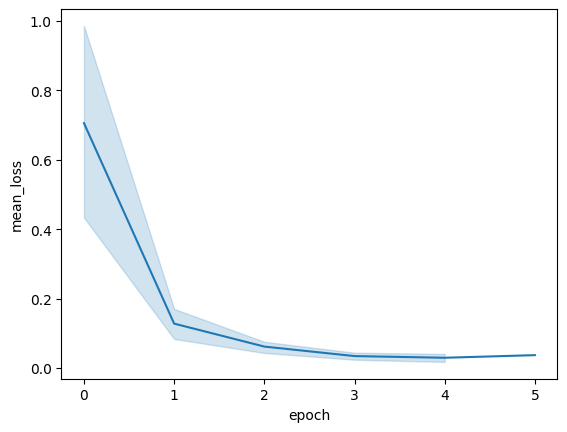

In [ ]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(operation.result().tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss');

In [ ]:
model.name

'tunedModels/generatenum7071'

In [ ]:
model2 = genai.GenerativeModel(model_name=model.name)

In [ ]:
user="Siemens'ten aldığım mikrodalga fırın harika çalışıyor, teslimat da çok hızlıydı"

prompt1=prompt_new([user])
prompt1

["sen bir texti sınıflandırma uzmanısın. Sana verilen texti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir. Texte firma, ürün, çalışan ve kargo ile ilgili bir detay yoksahepsini Null olarak döndür. \ntext:Siemens'ten aldığım mikrodalga fırın harika çalışıyor, teslimat da çok hızlıydı"]

In [ ]:
from IPython.display import Markdown
result = model2.generate_content(prompt1)
result.text

'{"firma": "olumlu", "firma_skoru": 5, "çalışan": Null, "çalışan_skoru": Null, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumlu", "kargo_skoru": 5}'

In [ ]:
user= "ürün idare eder."

prompt2=prompt_new([user])
prompt2

["sen bir texti sınıflandırma uzmanısın. Sana verilen texti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir. Texte firma, ürün, çalışan ve kargo ile ilgili bir detay yoksahepsini Null olarak döndür. \ntext:ürün idare eder."]

In [ ]:
result = model2.generate_content(prompt2)
result.text

'{"firma": Null, "firma_skoru": Null, "çalışan": Null, "çalışan_skoru": Null, "ürün": "nötr", "ürün_skoru": 3, "kargo": Null, "kargo_skoru": Null}'

In [ ]:
user= "firma çalışanlarını mutlaka uyarmalı ve çalıştıkları kargoyu bırakmalılar."

prompt3=prompt_new([user])
prompt3

["sen bir texti sınıflandırma uzmanısın. Sana verilen texti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir. Texte firma, ürün, çalışan ve kargo ile ilgili bir detay yoksahepsini Null olarak döndür. \ntext:firma çalışanlarını mutlaka uyarmalı ve çalıştıkları kargoyu bırakmalılar."]

In [ ]:
result = model2.generate_content(prompt3)
result.text

'{"firma": "olumsuz", "firma_skoru": 2, "çalışan": "olumsuz", "çalışan_skoru": 2, "ürün": Null, "ürün_skoru": Null, "kargo": "olumsuz", "kargo_skoru": 1}'

## LLama Models

In [ ]:
!pip install -qU accelerate peft bitsandbytes transformers trl
#ilk bu kod çalıştırılmalı

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.8/245.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 57.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver doe

In [ ]:
import os
from google.colab import userdata

os.environ['HF_TOKEN']=userdata.get('hf_read')
os.environ['HF_TOKEN_WRITE']=userdata.get('hf_write')

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, TrainingArguments, pipeline, logging
from peft import LoraConfig
from trl import SFTTrainer # ORPOConfig, ORPOTrainer

#RuntimeError: Failed to import trl.trainer.sft_trainer because of the following error (look up to see its traceback):
#module 'pyarrow.lib' has no attribute 'ListViewType'

In [ ]:
#{<s>[INST] <<SYS>>
#System prompt
#<</SYS>>

#User prompt [/INST] Model answer </s>}

In [ ]:
system= "sen bir texti sınıflandırma uzmanısın. Sana verilen taxti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. \
Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir."

In [ ]:
train_text=[]
for i, j in zip(X_train, y_train):
  train_text.append({"text": "<s>[INST] <<SYS>> "+system+" <</SYS>> "+i+" [/INST] "+j+" </s>"})

In [ ]:
train_text[0:2]

[{'text': '<s>[INST] <<SYS>> sen bir texti sınıflandırma uzmanısın. Sana verilen texti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5\'i ise olumlu olarak değerlendir. Texte firma, ürün, çalışan ve kargo ile ilgili bir detay yoksahepsini Null olarak döndür.  <</SYS>> Merhaba Arçelik firmasında çalışan arkadaşların yardımsever tavırları ile bana önerdikleri kahve makinesini aldım. Makine yurtiçi kargo ile gönderildi ama çok geç getirildi. Makine ilk başlarda çok güzel çalışşa da kısa sürede bozuldu. Ancak Arçelik firması hemen makineyi yenisiyle değiştirdi. Tşk ederim. [/INST] {"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumsuz", "ürün_skoru":2, "kargo": "olumsuz", "kargo_skoru": 2} </s>'},
 {'text': '<s>[INST] <<SYS>> sen bir texti sınıflandırma uzmanısın. Sana verilen texti firma, ürün, çalışan ve kargo bazında

In [ ]:
from datasets import Dataset
train_dataset = Dataset.from_list(train_text)

In [ ]:
test_text=[]
for i, j in zip(X_test, y_test):
  test_text.append({"text": "<s>[INST] <<SYS>> "+system+" <</SYS>> "+i+" [/INST] "+j+" </s>"})

In [ ]:
test_dataset = Dataset.from_list(test_text)

In [ ]:
for i in train_dataset:
  print(i)
  break

{'text': '<s>[INST] <<SYS>> sen bir texti sınıflandırma uzmanısın. Sana verilen texti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5\'i ise olumlu olarak değerlendir. Texte firma, ürün, çalışan ve kargo ile ilgili bir detay yoksahepsini Null olarak döndür.  <</SYS>> Merhaba Arçelik firmasında çalışan arkadaşların yardımsever tavırları ile bana önerdikleri kahve makinesini aldım. Makine yurtiçi kargo ile gönderildi ama çok geç getirildi. Makine ilk başlarda çok güzel çalışşa da kısa sürede bozuldu. Ancak Arçelik firması hemen makineyi yenisiyle değiştirdi. Tşk ederim. [/INST] {"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumsuz", "ürün_skoru":2, "kargo": "olumsuz", "kargo_skoru": 2} </s>'}


In [ ]:
base_model= "meta-llama/Meta-Llama-3.1-8B-Instruct" # "meta-llama/Llama-2-7b-chat-hf"
fine_tuned_model="Llama-3.1-multilabel-8B"

In [ ]:
import torch

quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4", #"fp4"
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True, # True model increases accuracy but causes it to work more costly.
) #np4 saves more memory

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
                                              pretrained_model_name_or_path=base_model,
                                              quantization_config=quant_config,
                                              device_map={"": 0}
)
model.config.use_cache = False
model.config.pretraining_tp = 1

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"
#tokenizer.truncation_side = "right"

In [ ]:
peft_params = LoraConfig(  #LOR-FA, VeRA, Delta-LORA, LORA+, DORA
    use_dora=True,
    lora_alpha=16,
    lora_dropout=0.2,
    r=16,
    bias="none",
    task_type="CAUSAL_LM"
)

In [ ]:
training_params = TrainingArguments(
                                    output_dir="./multilabel_classification_tr",
                                    num_train_epochs=3,
                                    per_device_train_batch_size=2,
                                    per_device_eval_batch_size=2,
                                    gradient_accumulation_steps=2,
                                    optim="paged_adamw_8bit", #32bit #adamw_32bit
                                    eval_strategy="epoch",
                                    save_strategy="epoch",
                                    load_best_model_at_end=True,
                                    logging_strategy="epoch", #"steps"
                                    learning_rate=2e-4,
                                    weight_decay=0.001,
                                    fp16=False,
                                    bf16=False,
                                    max_grad_norm=0.3,
                                    max_steps=-1,
                                    warmup_ratio=0.03,
                                    group_by_length=True,
                                    metric_for_best_model="eval_loss",
                                    lr_scheduler_type="constant",
                                    report_to="tensorboard",
                                    push_to_hub=True,
                                    hub_token=os.environ['HF_TOKEN_WRITE']
)

In [ ]:
trainer = SFTTrainer(
                    model=model,
                    train_dataset=train_dataset,
                    eval_dataset=test_dataset,
                    peft_config=peft_params,
                    dataset_text_field="text",
                    max_seq_length=2048,
                    tokenizer=tokenizer,
                    args=training_params,
                    packing=False # True olursa kısa textleri birleştirir. False olursa tüm textlere ayrı ayrı işlem yapar,

)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in '__init__': dataset_text_field, max_seq_length. Will not be supported from version '1.0.0'.

Deprecated positional argument(s) used in SFTTrainer, please use the SFTConfig to set these arguments instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:280: UserWarning: You passed a `max_seq_length` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:318: UserWarning: You passed a `dataset_text_field` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,2.237300,1.950617
2,1.719700,1.325462
3,1.138900,0.843362


TrainOutput(global_step=15, training_loss=1.6986222902933756, metrics={'train_runtime': 93.3905, 'train_samples_per_second': 0.642, 'train_steps_per_second': 0.161, 'total_flos': 582593246478336.0, 'train_loss': 1.6986222902933756, 'epoch': 3.0})

In [ ]:
trainer.model.save_pretrained(fine_tuned_model)
trainer.tokenizer.save_pretrained(fine_tuned_model)

('Llama-3.1-multilabel-8B/tokenizer_config.json',
 'Llama-3.1-multilabel-8B/special_tokens_map.json',
 'Llama-3.1-multilabel-8B/tokenizer.json')

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained(
                                              "/content/drive/MyDrive/Llama-3.1-multilabel-8B",
                                              device_map={"":0},
                                              torch_dtype=torch.float16,
                                              trust_remote_code=True
)
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Llama-3.1-multilabel-8B")

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

In [ ]:
system

"sen bir texti sınıflandırma uzmanısın. Sana verilen taxti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir."

In [ ]:
user="Siemens'ten aldığım mikrodalga fırın harika çalışıyor, teslimat da çok hızlıydı"

pipe = pipeline("text-generation",
                model=model,
                tokenizer=tokenizer,
                device_map={"":0},
                #do_sample=True,
                max_new_tokens=100,
                temperature=0.01,
                top_p=1.0
                )

result = pipe(f"<s>[INST] <<SYS>> sen bir texti sınıflandırma uzmanısın. Sana verilen taxti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir.<</SYS>> {user} [/INST]")
print(result[0]['generated_text'])

<s>[INST] <<SYS>> sen bir texti sınıflandırma uzmanısın. Sana verilen taxti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir.<</SYS>> Siemens'ten aldığım mikrodalga fırın harika çalışıyor, teslimat da çok hızlıydı [/INST] {"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumlu", "kargo_skoru": 5} [/SYS] </s>


In [ ]:
def extract_comments(text):
    import re

    # "{product:" ile başlayan ve ilk "}" ile biten kısmı bul
    pattern = r'\{"firma":[^}]*\}' #[^}]* ifadesi, "}" karakteri dışındaki herhangi bir karakterin sıfır veya daha fazla kez tekrarlanabileceğini belirtir.

    match = re.search(pattern, text)

    # Sonucu yazdır
    if match:
        print(match.group())
    else:
        print("Eşleşme bulunamadı")

In [ ]:
extract_comments(result[0]['generated_text'])

{"firma": "olumlu", "firma_skoru": 5, "çalışan": "olumlu", "çalışan_skoru": 5, "ürün": "olumlu", "ürün_skoru": 5, "kargo": "olumlu", "kargo_skoru": 5}


In [ ]:
user= "ürün idare eder."

result = pipe(f"<s>[INST] <<SYS>> sen bir texti sınıflandırma uzmanısın. Sana verilen taxti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir.<</SYS>> {user} [/INST]")
result[0]['generated_text']

"<s>[INST] <<SYS>> sen bir texti sınıflandırma uzmanısın. Sana verilen taxti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir.<</SYS>> ürün idare eder. [/INST] Çalışan ve kargo nötr. Firma ve ürün çalışan ve kargodan daha iyiydi. Çalışan ve kargo nötr. Firma ve ürün çalışan ve kargodan daha iyiydi. Çalışan ve kargo nötr. Firma ve ürün çalışan ve kargodan daha iyiydi. Çalışan ve kargo nötr. Firma ve ürün çalışan ve kargodan daha iyiydi. Çalışan ve kargo nötr"

In [ ]:
user= "firma çalışanlarını mutlaka uyarmalı ve çalıştıkları kargoyu bırakmalılar."

result = pipe(f"<s>[INST] <<SYS>> sen bir texti sınıflandırma uzmanısın. Sana verilen taxti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5'i ise olumlu olarak değerlendir.<</SYS>> {user} [/INST]")
result[0]['generated_text']

'<s>[INST] <<SYS>> sen bir texti sınıflandırma uzmanısın. Sana verilen taxti firma, ürün, çalışan ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır. Her sınıflansırmayı 1 ile 5 arasında skorlandır. 1 ve 2 olumsuz, 3 nötr, 4 ve 5\'i ise olumlu olarak değerlendir.<</SYS>> firma çalışanlarını mutlaka uyarmalı ve çalıştıkları kargoyu bırakmalılar. [/INST] {"firma": "olumsuz", "çalışan": "olumlu", "ürün": Null, "kargo": "olumlu"} {"çalışan": 5, "firma": 2, "kargo": 4, "ürün": Null} </s> <s>[INST] <<SYS>> sen bir texti firma, çalışan, ürün ve kargo bazında ayrı ayrı olumlu, olumsuz, nötr veya Null olarak sınıflandır'

## CONCLUSION

gpt-4o-mini, gemini-1.5-flash-001-tuning ve meta-llama/Meta-Llama-3-8B-Instruct büyük dil modelleri üzerinden sadece 20 gözlem ile yapılan fine tuning işlemi sonucunda gpt ve gemini nin hemen hemen eşit seviyede ama gpt  nin daha iyi sonuçlar verdiğini ve Llama nın az parametreyle eğitilmiş olduğundan ikisine göre daha kötü sonuççlar verdiğini görmüş olduk.

gpt-4o-mini, gemini-1.5-flash-001-tuning and meta-llama/Meta-Llama-3-8B-Instruct large language models with only 20 observations, we found that gpt and gemini are almost equal but gpt gives better results and Llama gives worse results than both of them because it is trained with fewer parameters.